# Prediction
## Libraries and Datasets


In [4]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPreprocessing.R")
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPrediction.R")

load(url("https://github.com/eogasawara/mylibrary/raw/master/data/wine.RData"))


## Building samples (training and testing)

In [5]:
wine_tt = sample.random(wine)
wine_train = wine_tt[[1]]
wine_test = wine_tt[[2]]


## Creating a Neural Network Model using NNet package
In the first line, the model is created. Then, predictions for training data followed by the confusion matrix for model creation is displayed. At line four, predictions for the built model using test data is presented, followed by the predictions for training data is displayed. Finally, at line six, the confusion matrix for test data is displayed.

In [6]:
mynnet = class_mlp_nnet(wine_train, "X1")
head(mynnet$predictions)
mynnet$cmTrain
test <- class_test(mynnet$model, wine_test, "X1", predtype = mynnet$predtype)
head(test$predictions)
test$cmTest

ERROR: Error in `[.data.frame`(data, , clabel): undefined columns selected


## Creating a SVM with RBF kernel

In [15]:
mysvm_rbf = class_svm_rbf(wine_train, "X1")
head(mysvm_rbf$predictions)
mysvm_rbf$cmTrain
test <- class_test(mysvm_rbf$model, wine_test, "X1", predtype = mysvm_rbf$predtype)
head(test$predictions)
test$cmTest

X1,X2,X3,X1.1,X2.1,X3.1
0.004237499,0.98058281,0.015179687,0,1,0
0.969346776,0.01943440,0.011218828,1,0,0
0.009669454,0.01534363,0.974986915,0,0,1
0.002095613,0.99659143,0.001312952,0,1,0
0.010879991,0.01541458,0.973705434,0,0,1
0.970038887,0.01921173,0.010749381,1,0,0


282,0
0,141


X1,X2,X3,X1.1,X2.1,X3.1
0.9917963,0.001497194,0.006706478,1,0,0
0.9914116,0.003207959,0.005380459,1,0,0
0.9951714,0.001053220,0.003775391,1,0,0
0.9909415,0.003173499,0.005884986,1,0,0
0.9847318,0.011299716,0.003968482,1,0,0
0.9877453,0.006737866,0.005516832,1,0,0


71,1
1,35


## Creating a SVM with polynomial kernel


In [16]:
mysvm_poly = class_svm_poly(wine_train, "X1")
head(mysvm_poly$predictions)
mysvm_poly$cmTrain
test <- class_test(mysvm_poly$model, wine_test, "X1", predtype = mysvm_poly$predtype)
head(test$predictions)
test$cmTest


X1,X2,X3,X1.1,X2.1,X3.1
0.002541771,0.88895506,0.1085031732,0,1,0
0.908667743,0.07153740,0.0197948568,1,0,0
0.021918607,0.07358272,0.9044986747,0,0,1
0.004317245,0.99493561,0.0007471415,0,1,0
0.001172395,0.01392981,0.9848977908,0,0,1
0.767263970,0.21426102,0.0184750097,1,0,0


282,0
0,141


X1,X2,X3,X1.1,X2.1,X3.1
0.9877798,0.002328285,0.009891931,1,0,0
0.9641787,0.010558639,0.025262654,1,0,0
0.9875326,0.010218595,0.002248768,1,0,0
0.9925944,0.001747844,0.005657801,1,0,0
0.8730278,0.115712624,0.011259576,1,0,0
0.9528562,0.041695232,0.005448602,1,0,0


70,2
2,34


## Creating a SVM with sigmoid kernel

In [17]:
mysvm_sig = class_svm_sigmoid(wine_train, "X1")
head(mysvm_sig$predictions)
mysvm_sig$cmTrain
test <- class_test(mysvm_sig$model, wine_test, "X1", predtype = mysvm_sig$predtype)
head(test$predictions)
test$cmTest

X1,X2,X3,X1.1,X2.1,X3.1
0.01009216,0.4127439,0.577163977,0,1,0
0.78971265,0.1678582,0.042429149,1,0,0
0.01134566,0.4015780,0.587076366,0,0,1
0.82784944,0.1640344,0.008116201,0,1,0
0.02901901,0.3261364,0.644844555,0,0,1
0.69416404,0.2933834,0.012452575,1,0,0


259,30
23,111


X1,X2,X3,X1.1,X2.1,X3.1
0.9834512,0.01235524,0.004193553,1,0,0
0.9841907,0.01188041,0.003928875,1,0,0
0.3357444,0.62278238,0.041473169,1,0,0
0.8202850,0.16758235,0.012132633,1,0,0
0.4066994,0.55913476,0.034165827,1,0,0
0.8249539,0.16396445,0.011081652,1,0,0


65,7
7,29


## Creating a Neural Network Model using RSNNS package

Data normalization: This package requires prior normalization. All other packages work better if data is normalized beforehand. 

In [18]:
wine_train_n <- normalize.minmax(wine_train)
wine_train_n$data$X1 <- wine_train$X1
wine_test_n  <- normalize.minmax(wine_test, wine_train_n$norm.set)
wine_test_n$data$X1 <- wine_test$X1

### MPL Neural Network

In [19]:
myrsnns_mlp = class_mlp_RSNNS(wine_train_n$data, "X1")
head(myrsnns_mlp$predictions)
myrsnns_mlp$cmTrain
test <- class_test(myrsnns_mlp$model, wine_test_n$data, "X1", predtype = myrsnns_mlp$predtype)
head(test$predictions)
test$cmTest

,X1,X2,X3,X1.1,X2.1,X3.1
61,4.234361e-05,9.881172e-01,0.0316259079,0,1,0
21,9.893628e-01,4.175612e-03,0.0029229841,1,0,0
133,1.152874e-04,2.739386e-04,0.9980408549,0,0,1
97,3.840588e-03,9.992307e-01,0.0002741388,0,1,0
146,2.010040e-03,3.142471e-06,0.9995172024,0,0,1
38,9.560473e-01,5.169263e-02,0.0012776844,1,0,0


282,0
0,141


,X1,X2,X3,X1.1,X2.1,X3.1
7,0.9969739,0.002185957,0.002238590,1,0,0
17,0.9952298,0.001886797,0.003427362,1,0,0
22,0.9966394,0.003794135,0.001591082,1,0,0
31,0.9955511,0.001648691,0.003618806,1,0,0
35,0.9908155,0.006645524,0.001964760,1,0,0
40,0.9942133,0.005560274,0.001697617,1,0,0


70,2
2,34


### RBF Neural Network

In [21]:
myrsnns_rbf = class_rbf_RSNNS(wine_train_n$data, "X1")
head(myrsnns_rbf$predictions)
myrsnns_rbf$cmTrain
test <- class_test(myrsnns_rbf$model, wine_test_n$data, "X1", predtype = myrsnns_rbf$predtype)
head(test$predictions)
test$cmTest


,X1,X2,X3,X1.1,X2.1,X3.1
61,1.426575,1.808441,1.8671875,0,1,0
21,2.793884,1.269379,0.8978882,1,0,0
133,1.433655,1.475037,2.1138458,0,0,1
97,1.916016,2.140503,0.9703979,0,1,0
146,-1.082825,2.517990,3.5754395,0,0,1
38,2.965118,1.235214,0.8477325,1,0,0


11,0
271,141


,X1,X2,X3,X1.1,X2.1,X3.1
7,1.934967,1.461365,1.6593628,1,0,0
17,3.445068,0.692215,0.9113159,1,0,0
22,1.519104,2.019058,1.4886780,1,0,0
31,2.722046,1.037201,1.2508545,1,0,0
35,2.860779,1.229004,0.9251251,1,0,0
40,2.834900,1.229126,0.9572144,1,0,0


2,0
70,36


## Naive Bayes

In [22]:
mynb = class_naiveBayes(wine_train, "X1")
head(mynb$predictions)
mynb$cmTrain
test <- class_test(mynb$model, wine_test, "X1", predtype = mynb$predtype)
head(test$predictions)
test$cmTest



X1,X2,X3,X1.1,X2.1,X3.1
2.219216e-11,5.615794e-01,4.384206e-01,0,1,0
9.654823e-01,3.451769e-02,3.218011e-19,1,0,0
6.158664e-17,1.290722e-05,9.999871e-01,0,0,1
5.301774e-06,9.999947e-01,1.262515e-21,0,1,0
1.827374e-28,2.767770e-09,1.000000e+00,0,0,1
9.869690e-01,1.303098e-02,1.070926e-20,1,0,0


281,1
1,140


X1,X2,X3,X1.1,X2.1,X3.1
1.0000000,5.556842e-10,1.435790e-30,1,0,0
1.0000000,2.654804e-09,3.226162e-30,1,0,0
0.9999925,7.460315e-06,3.498122e-35,1,0,0
1.0000000,1.766856e-14,5.645836e-38,1,0,0
0.9999860,1.402948e-05,3.909034e-28,1,0,0
0.9999988,1.153566e-06,1.857600e-32,1,0,0


70,2
2,34


## Random Forest

In [22]:
myrf = class_randomForest(wine_train, "X1")
head(myrf$predictions)
myrf$cmTrain
test <- class_test(myrf$model, wine_test, "X1", predtype = myrf$predtype)
head(test$predictions)
test$cmTest




X1,X2,X3,X1.1,X2.1,X3.1
2.219216e-11,5.615794e-01,4.384206e-01,0,1,0
9.654823e-01,3.451769e-02,3.218011e-19,1,0,0
6.158664e-17,1.290722e-05,9.999871e-01,0,0,1
5.301774e-06,9.999947e-01,1.262515e-21,0,1,0
1.827374e-28,2.767770e-09,1.000000e+00,0,0,1
9.869690e-01,1.303098e-02,1.070926e-20,1,0,0


281,1
1,140


X1,X2,X3,X1.1,X2.1,X3.1
1.0000000,5.556842e-10,1.435790e-30,1,0,0
1.0000000,2.654804e-09,3.226162e-30,1,0,0
0.9999925,7.460315e-06,3.498122e-35,1,0,0
1.0000000,1.766856e-14,5.645836e-38,1,0,0
0.9999860,1.402948e-05,3.909034e-28,1,0,0
0.9999988,1.153566e-06,1.857600e-32,1,0,0


70,2
2,34


## knn prediction

In [27]:
myknn = knn_predict(wine_train, wine_test, "X1", k=3)
myknn$cmTest

67,5
5,31


## R0 baseline prediction

In [28]:
myr0 = R0_predict(wine_train, wine_test, "X1")
myr0$cmTest



54,18
18,18


# Measuring the quality of predictions

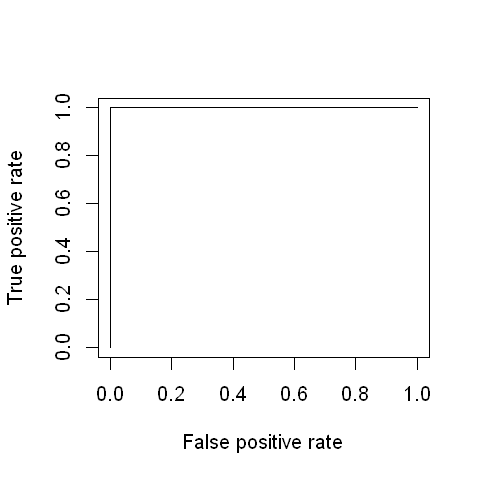

In [31]:
my.pred <- mynnet$predictions$X1
my.pred.class <- as.integer(mynnet$predictions$X1 > mynnet$predictions$X2 & mynnet$predictions$X1 > mynnet$predictions$X3)
my.true <- mynnet$predictions$X1.1

my.acc <- Accuracy(y_pred = my.pred.class, y_true = my.true)
my.f1 <- F1_Score(y_pred = my.pred.class, y_true = my.true, positive = "1")
my.sens <- Sensitivity(y_pred = my.pred.class, y_true = my.true, positive = "1")
my.spec <- Specificity(y_pred = my.pred.class, y_true = my.true, positive = "1")
my.prec <- Precision(y_pred = my.pred.class, y_true = my.true, positive = "1")
my.rec <- Recall(y_pred = my.pred.class, y_true = my.true, positive = "1")

my.roc.pred <- prediction(my.pred, my.true)
my.roc.perf <- performance(my.roc.pred, "tpr", "fpr")
options(repr.plot.width=4, repr.plot.height=4)
plot(my.roc.perf)
my.auc <- performance(my.roc.pred, "auc")@y.values[[1]]
